In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from sklearn.cluster import KMeans
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import hdbscan
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import geojson
import json

In [2]:
# Reading the file with metrices
df_parking = gpd.read_file("F:/Berlin-DOP_2020/Processed images_new/parking_dist.gpkg", layer="parking_disolved_withdata")

In [3]:
# Renaming the column heading
df_parking = df_parking.rename(columns={'True or False': 'True_or_False'})
df_parking.loc[df_parking.True_or_False == "true", 'True_or_False'] = 1
df_parking.loc[df_parking.True_or_False == "false", 'True_or_False'] = 0
df_parking = pd.DataFrame(df_parking[['parking_area_m2', 'nearest_geometry_dis', 'True_or_False']])

In [4]:
df_parking['True_or_False'] = df_parking['True_or_False'].astype(str)

In [5]:
X = df_parking.iloc[:,:-1]

In [6]:
y = df_parking["True_or_False"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 0)

In [8]:
reg = LogisticRegression(max_iter= 300)
reg.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [9]:
y_pred = reg.predict(X_test)

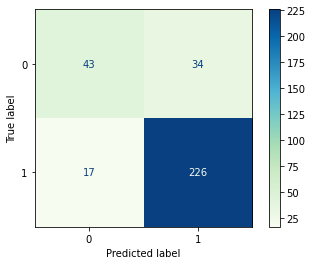

In [10]:
confusion_matrix = metrics.plot_confusion_matrix(reg, X_test, y_test, cmap = "GnBu")
print(confusion_matrix)

In [11]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.840625


In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.56      0.63        77
           1       0.87      0.93      0.90       243

    accuracy                           0.84       320
   macro avg       0.79      0.74      0.76       320
weighted avg       0.83      0.84      0.83       320



In [13]:
y_pred = [int(y_pred) for y_pred in y_pred]
y_test =y_test.astype(int).array

AUC: 0.81


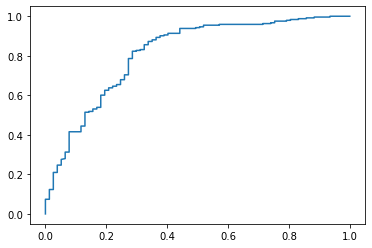

In [14]:
# ROC curve and AUC
y_pred_prob = reg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve (y_test, y_pred_prob)
plt.plot(fpr, tpr)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
print("AUC:", round(auc,2))

In [ ]:
# Reading the file with predictions
df_pred_new = gpd.read_file("F:/Berlin-DOP_2020/Processed images_new/Final/Predic_dissolved.geojson",crs='EPSG:25833')

In [ ]:
# Renaming the column heading
df_pred = pd.DataFrame(df_pred_new[['parking_area_m2', 'nearest_geometry_dis']])

In [ ]:
df_pred

In [ ]:
y_pred_pred = reg.predict(df_pred)

In [ ]:
df_pred_new.to_file("F:/Berlin-DOP_2020/Processed images_new/Final/Processed_dissolved.geojson", crs='EPSG:25833')

In [ ]:
df_pred_new['True_or_False']= y_pred_pred
df_pred_new.loc[df_pred_new.True_or_False == "1", 'True_or_False'] = "true"
df_pred_new.loc[df_pred_new.True_or_False == "0", 'True_or_False'] = "false"

In [ ]:
# Merging with original dataframe
df_original = gpd.read_file("F:/Berlin-DOP_2020/Processed images_new/Predictions.geojson", crs='EPSG:25833')

In [ ]:
df_original

In [ ]:
df_pred_new

In [ ]:
Merged_df = df_original.merge(df_pred_new, on='id', how='inner')

In [ ]:
Merged_df = Merged_df.drop(['geometry_y'], axis = 1)

In [ ]:
Merged_gdf = gpd.GeoDataFrame(Merged_df, geometry="geometry_x", crs='EPSG:25833')

In [ ]:
Merged_gdf

In [ ]:
Merged_gdf = Merged_pdf

In [ ]:
with open("F:/Berlin-DOP_2020/Processed images_new/Final/Final_dataframe_1.geojson", 'a') as f:
    geojson.dump(Merged_gdf, f)

In [ ]:
#Merged_gdf.to_file("F:/Berlin-DOP_2020/Processed images_new/Final/Final_dataframe.geojson")

In [ ]:
df_true_only = Merged_gdf.loc[Merged_gdf["True_or_False"] == "true"]

In [ ]:
#df_true_only.to_file("F:/Berlin-DOP_2020/Processed images_new/Final/True_Only.geojson")

In [ ]:
with open("F:/Berlin-DOP_2020/Processed images_new/Final/True_Only_1.geojson", 'a') as f:
    geojson.dump(df_true_only, f)